Initializing SMC sampler...
Sampling 16 chains in 16 jobs
Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.002
Stage:   2 Beta: 0.005
Stage:   3 Beta: 0.015
Stage:   4 Beta: 0.049
Stage:   5 Beta: 0.152
Stage:   6 Beta: 0.425
Stage:   7 Beta: 0.953
Stage:   8 Beta: 1.000


array([[<AxesSubplot:title={'center':'μ'}>,
        <AxesSubplot:title={'center':'μ'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'σ'}>,
        <AxesSubplot:title={'center':'σ'}, xlabel='Rank (all chains)'>]],
      dtype=object)

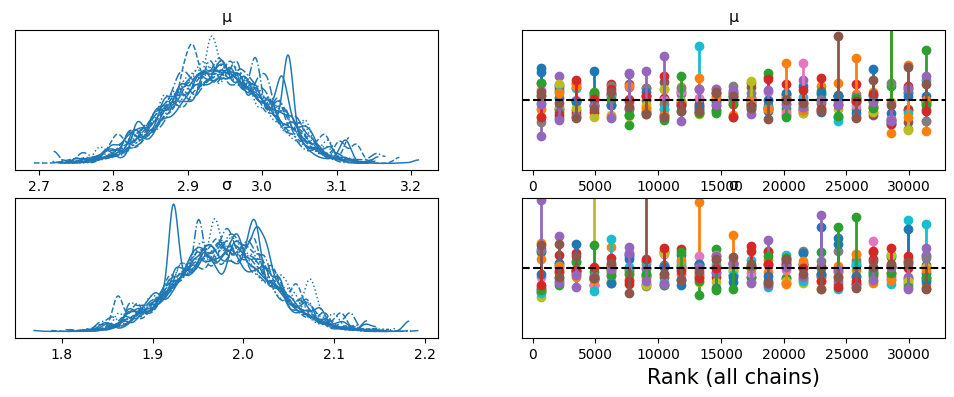

In [5]:
from scipy import stats
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm

data = np.random.normal(loc=3, scale=2, size=1000) #y os dados reais

def normal_simulator(μ, σ): #y^ são os dados simulados, a distância destes aos reais é o que vai ser minimizado
    return np.random.normal(μ, σ, 1000)

with pm.Model() as gauss:
    μ = pm.Normal("μ", mu=5, sigma=1) #prior para mu
    σ = pm.HalfNormal("σ", sigma=3) #prior para sigma
    s = pm.Simulator("s", normal_simulator, params=[μ, σ],
                     distance="gaussian",
                     sum_stat="sort",  
                     epsilon=1,
                     observed=data)
    trace, sim_data = pm.sample_smc(kernel="ABC", parallel=True, save_sim_data=True)
    idata = az.from_pymc3(trace, posterior_predictive=sim_data)
    
az.plot_trace(idata, kind="rank_vlines")

In [59]:
from scipy import stats
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
from scipy.stats import gengamma

itera = 1000
gfg=np.zeros(itera)
for i in range(itera):
    gfg[i] = gengamma.rvs(1, 0.5, 0, 0.0005, size=1)[0]
    
data = gfg


def gamma_sim(form, scal):
    itera = 1000
    gfg2=np.zeros(itera)
    for i in range(itera):
        gfg2[i] = gengamma.rvs(2*form, form, 0, scal, size=1)[0]

with pm.Model() as gauss:
    form = pm.Normal("form", mu=0.7, sigma=1) #prior para form
    scal = pm.HalfNormal("scal", sigma=0.003) #prior para scal
    s = pm.Simulator("s", gamma_sim, params=[form, scal],
                     distance="gaussian",
                     sum_stat="sort",  
                     epsilon=0.001,
                     observed=data)
    trace, sim_data = pm.sample_smc(kernel="ABC", parallel=False, save_sim_data=True)
    idata = az.from_pymc3(trace, posterior_predictive=sim_data)
    
#az.plot_trace(idata, kind="rank_vlines")

Initializing SMC sampler...
Sampling 16 chains in 16 jobs


AxisError: axis -1 is out of bounds for array of dimension 0